Earliest timestamp: 2012-01-01 00:00:00
Latest timestamp: 2014-12-31 23:00:00
Train timestamps: 23650
Test timestamps: 2608
Train prediction/actual: 23650 23650
Test prediction/actual: 2608 2608


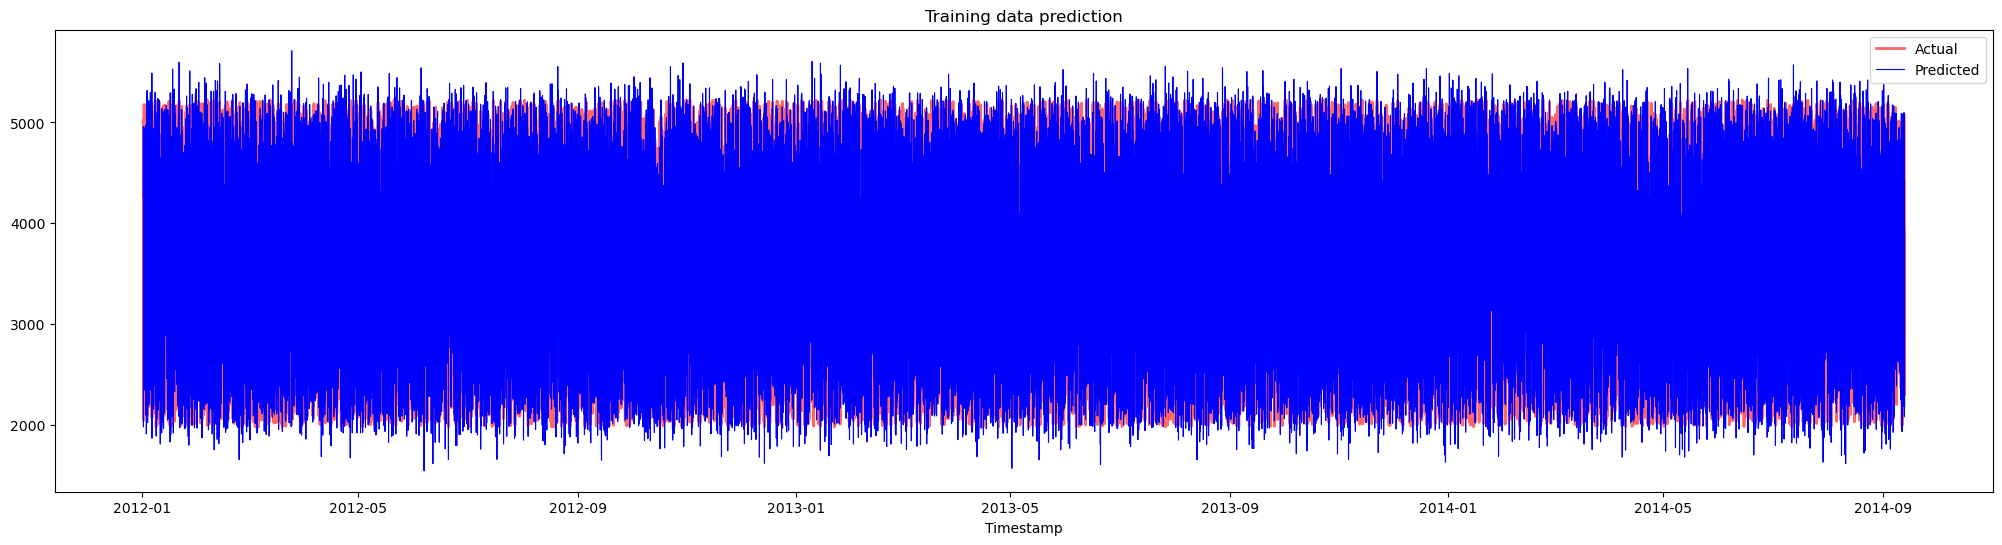

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and prepare the data
energy = pd.read_csv('energy.csv', parse_dates=['timestamp'], index_col='timestamp')
energy = energy.sort_index()

# Show full date range
print("Earliest timestamp:", energy.index.min())
print("Latest timestamp:", energy.index.max())

# Set column to predict and time window
target_column = 'load'
timesteps = 24

# Automatically define start dates from actual data
full_index = energy.index
start_date = full_index.min()
mid_date = full_index[int(len(full_index) * 0.9)]  # 90% for training, 10% for testing

train_start_dt = start_date
test_start_dt = mid_date

# Filter and slice timestamp windows
train_data = energy[(energy.index < test_start_dt) & (energy.index >= train_start_dt)]
test_data = energy[energy.index >= test_start_dt]

train_timestamps = train_data.index[timesteps - 1:]
test_timestamps = test_data.index[timesteps - 1:]

print("Train timestamps:", len(train_timestamps))
print("Test timestamps:", len(test_timestamps))

# Check for empty sets before proceeding
if len(train_timestamps) == 0 or len(test_timestamps) == 0:
    raise ValueError("Still empty! Try reducing timesteps or check dataset size.")

# Scale all values
all_y = energy[[target_column]].values
scaler = MinMaxScaler()
scaler.fit(all_y)

# Simulate model predictions (you can replace these later)
y_train = np.random.rand(len(train_timestamps), 1)
y_test = np.random.rand(len(test_timestamps), 1)
y_train_pred = y_train + np.random.normal(0, 0.05, size=y_train.shape)
y_test_pred = y_test + np.random.normal(0, 0.05, size=y_test.shape)

# Inverse transform
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print("Train prediction/actual:", len(y_train_pred), len(y_train))
print("Test prediction/actual:", len(y_test_pred), len(y_test))

# Plot training results
plt.figure(figsize=(25, 6))
plt.plot(train_timestamps, y_train, color='red', linewidth=2.0, alpha=0.6)
plt.plot(train_timestamps, y_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()